In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress


# Import keys
from config import w_api_key
from config import gkey

# Import citipy module
# Be sure to be in PythonData where this installed to have this work
from citipy import citipy

# Output file
output_data_file = "output_data/cities.csv"

# Set range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


In [24]:
# List for holding lat_lngs and cities
coordinates = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=30)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=30)
coordinates = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for coord in coordinates:
    city = citipy.nearest_city(coord[0], coord[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

28

In [25]:
cities

['punta arenas',
 'iseyin',
 'basco',
 'ushuaia',
 'severo-kurilsk',
 'batagay-alyta',
 'tiksi',
 'te anau',
 'camacha',
 'cuenca',
 'alta floresta',
 'artyk',
 'busselton',
 'tezu',
 'pacific grove',
 'east london',
 'bredasdorp',
 'shepsi',
 'illela',
 'sierpc',
 'pandan',
 'hithadhoo',
 'kodiak',
 'port alfred',
 'rijeka',
 'mataura',
 'kapaa',
 'tuktoyaktuk']

In [28]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
farenheit = "units=imperial" #imperial
city = cities[2]


# Build query URL
query_url = url + "appid=" + w_api_key + "&q=" + city + "&units=imperial"

# Hooray!  I'm talking to the data source and my call is working.

In [32]:
# Ok how am I getting information out of the json/results?
city_data_test = requests.get(query_url).json()
city_data_test

{'coord': {'lon': 121.9702, 'lat': 20.4487},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 73.78,
  'feels_like': 65.89,
  'temp_min': 73.78,
  'temp_max': 73.78,
  'pressure': 1017,
  'humidity': 83,
  'sea_level': 1017,
  'grnd_level': 1013},
 'visibility': 10000,
 'wind': {'speed': 26.06, 'deg': 58},
 'clouds': {'all': 98},
 'dt': 1612759400,
 'sys': {'country': 'PH', 'sunrise': 1612736738, 'sunset': 1612777622},
 'timezone': 28800,
 'id': 1726449,
 'name': 'Basco',
 'cod': 200}

In [30]:
# Set up dataframe to hold data from Open Weather

weather_data = pd.DataFrame({
    "City": cities
})

# Add empty columns to fill
weather_data["Lat"] = ""
weather_data["Long"] = ""
weather_data["Max Temp"] = ""
weather_data["Humidity"] = ""
weather_data["Cloudiness"] = ""
weather_data["Wind Speed"] = ""
weather_data["Country"] = ""
weather_data["Date"] = ""

weather_data

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,punta arenas,,,,,,,,
1,iseyin,,,,,,,,
2,basco,,,,,,,,
3,ushuaia,,,,,,,,
4,severo-kurilsk,,,,,,,,
5,batagay-alyta,,,,,,,,
6,tiksi,,,,,,,,
7,te anau,,,,,,,,
8,camacha,,,,,,,,
9,cuenca,,,,,,,,


In [34]:
# Set up a for loop to go through the weather_data dataframe
# to look for data for each city
# params = {degrees = farenheit}

base_url = url + "appid=" + w_api_key + "&units=imperial" + "&q=" 

for index, row in weather_data.iterrows():
    
    # Get the city name from the df
    name = row["City"]
    
    # Add city to url
    print(f"Retrieving data for {index}: {name}.")
    response = requests.get(base_url + name).json()
    
#     print(response)
    
    # Extract data
    results = response
#     print(results["coord"]["lat"])
    
    try:
#         print("Proof of entry into try block")
        weather_data.loc[index, "Lat"] = results["coord"]["lat"]
        weather_data.loc[index, "Long"] = results["coord"]["lon"]
        weather_data.loc[index, "Max Temp"] = results["main"]["temp_max"]
        weather_data.loc[index, "Humidity"] = results["main"]["humidity"]
        weather_data.loc[index, "Cloudiness"] = results["clouds"]["all"]
        weather_data.loc[index, "Wind Speed"] = results["wind"]["speed"]
        weather_data.loc[index, "Country"] = results["sys"]["country"]
        weather_data.loc[index, "Date"] = results["dt"]
        
        print(f"Retrieving results for {name}. Loading stats.")
        
    except KeyError:
        print(f"{name} not found.")
        pass
    
    time.sleep(1)


Retrieving data for 0: punta arenas.
Retrieving results for punta arenas. Loading stats.
Retrieving data for 1: iseyin.
Retrieving results for iseyin. Loading stats.
Retrieving data for 2: basco.
Retrieving results for basco. Loading stats.
Retrieving data for 3: ushuaia.
Retrieving results for ushuaia. Loading stats.
Retrieving data for 4: severo-kurilsk.
Retrieving results for severo-kurilsk. Loading stats.
Retrieving data for 5: batagay-alyta.
Retrieving results for batagay-alyta. Loading stats.
Retrieving data for 6: tiksi.
Retrieving results for tiksi. Loading stats.
Retrieving data for 7: te anau.
Retrieving results for te anau. Loading stats.
Retrieving data for 8: camacha.
Retrieving results for camacha. Loading stats.
Retrieving data for 9: cuenca.
Retrieving results for cuenca. Loading stats.
Retrieving data for 10: alta floresta.
Retrieving results for alta floresta. Loading stats.
Retrieving data for 11: artyk.
artyk not found.
Retrieving data for 12: busselton.
Retrieving 

In [35]:
weather_data

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,punta arenas,-53.15,-70.9167,57.2,44,75,8.05,CL,1612759324
1,iseyin,7.9667,3.6,72.41,95,54,0.58,NG,1612759519
2,basco,20.4487,121.97,73.78,83,98,26.06,PH,1612759520
3,ushuaia,-54.8,-68.3,51.8,82,75,2.3,AR,1612759243
4,severo-kurilsk,50.6789,156.125,25.3,93,91,20.54,RU,1612759424
5,batagay-alyta,67.8006,130.411,-22.47,77,15,1.72,RU,1612759431
6,tiksi,71.6872,128.869,-28.5,86,61,5.26,RU,1612759445
7,te anau,-45.4167,167.717,65.37,66,100,5.75,NZ,1612759526
8,camacha,33.0833,-16.3333,60.8,88,40,14.97,PT,1612759390
9,cuenca,-2.8833,-78.9833,57.2,94,100,2.3,EC,1612759528


In [36]:
# Export weather_data to csv
# This file is a place holder for proof of concept.
# Update with full data set later

weather_data.to_csv("Working_data.csv", index=False)

weather_data_2 = pd.read_csv("Working_data.csv")
weather_data_2

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,punta arenas,-53.1500,-70.9167,57.20,44.0,75.0,8.05,CL,1.612759e+09
1,iseyin,7.9667,3.6000,72.41,95.0,54.0,0.58,NG,1.612760e+09
2,basco,20.4487,121.9702,73.78,83.0,98.0,26.06,PH,1.612760e+09
3,ushuaia,-54.8000,-68.3000,51.80,82.0,75.0,2.30,AR,1.612759e+09
4,severo-kurilsk,50.6789,156.1250,25.30,93.0,91.0,20.54,RU,1.612759e+09
5,batagay-alyta,67.8006,130.4114,-22.47,77.0,15.0,1.72,RU,1.612759e+09
6,tiksi,71.6872,128.8694,-28.50,86.0,61.0,5.26,RU,1.612759e+09
7,te anau,-45.4167,167.7167,65.37,66.0,100.0,5.75,NZ,1.612760e+09
8,camacha,33.0833,-16.3333,60.80,88.0,40.0,14.97,PT,1.612759e+09
9,cuenca,-2.8833,-78.9833,57.20,94.0,100.0,2.30,EC,1.612760e+09


In [37]:
# Make a heck ton of scatter plots

ValueError: could not convert string to float: 

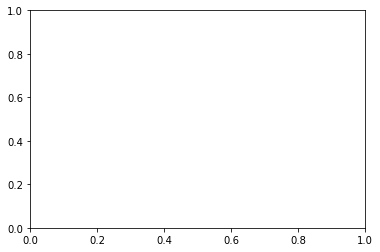

In [39]:
# Temperature vs Latitude
x = weather_data["Lat"]
temp_y = weather_data["Max Temp"]

plt.plot (x, temp_y, "bo")
plt.ylabel("Maximum Temperature")
plt.title("City Temperature by Latitude")
plt.show()

# Why won't my plt.xlabel work????

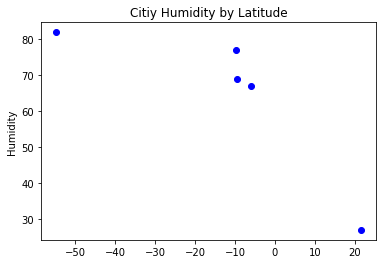

In [12]:
# Humidity vs Latitude
humid_y = weather_data["Humidity"]

plt.plot(x, humid_y, "bo")
plt.ylabel("Humidity")
# plt.xlabel("Latitude")
plt.title("Citiy Humidity by Latitude")
plt.show()

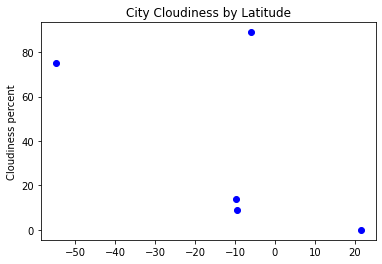

In [13]:
# Cloudiness vs Latitude
cloud_y = weather_data["Cloudiness"]

plt.plot(x, cloud_y, "bo")
plt.ylabel("Cloudiness percent")
plt.title("City Cloudiness by Latitude")
plt.show()

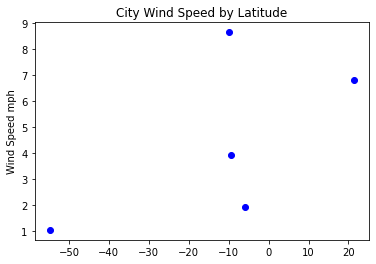

In [14]:
# Wind Speed by Latitude
wind_y = weather_data["Wind Speed"]

plt.plot(x, wind_y, "bo")
plt.ylabel("Wind Speed mph")
plt.title("City Wind Speed by Latitude")
plt.show()

In [15]:
# Separate df by hemispheres
northern_weather = weather_data_2.loc[weather_data["Lat"] >= 0]
northern_weather

southern_weather = weather_data_2.loc[weather_data["Lat"] <= 0]
southern_weather

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,atuona,-9.8000,-139.0333,299.55,77,14,8.64,PF,1612757740
1,honiara,-9.4333,159.9500,303.27,69,9,3.92,SB,1612757741
2,ushuaia,-54.8000,-68.3000,284.15,82,75,1.03,AR,1612757482
3,jucurutu,-6.0339,-37.0203,298.74,67,89,1.92,BR,1612757741


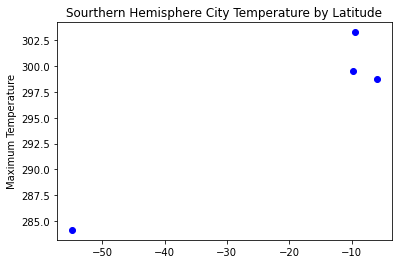

In [17]:
# Let's start with the Northern Hemisphere (because sample set is mostly northern)

# Northern Temp vs Latitude
south_x = southern_weather["Lat"]
south_temp = southern_weather["Max Temp"]

plt.plot (south_x, south_temp, "bo")
plt.ylabel("Maximum Temperature")
# plt.xlabel("Latitude")
plt.title("Sourthern Hemisphere City Temperature by Latitude")
plt.show()

# Calculate the regression


The correlation between latitude and temperature in the Southern Hemisphere is 0.96


Text(-40, 285, 'y = 0.35x + 303.39')

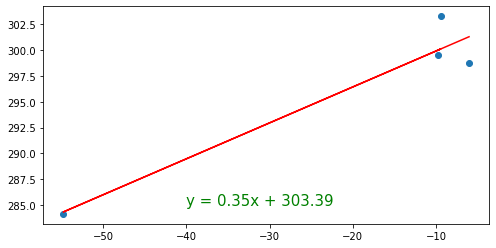

In [23]:
correlation = st.pearsonr(south_x, south_temp)
print(f"The correlation between latitude and temperature in the Southern Hemisphere is {round(correlation[0],2)}")

# Calculate the line of best fit and plot on the graph
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_x, south_temp)
regress_values = south_x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(8, 4))
plt.scatter(south_x, south_temp)
plt.plot(south_x, regress_values, "r-")
plt.annotate(line_eq,(-40,285),fontsize=15,color="green")

In [ ]:
# Can't run this until I have a larger data set


# correlation = st.pearsonr(north_x, north_temp)
# print(f"The correlation between latitude and temperature in the Northern Hemisphere is {round(correlation[0],2)}")

# # Calculate the line of best fit and plot on the graph
# (slope, intercept, rvalue, pvalue, stderr) = linregress(north_x, north_temp)
# regress_values = north_x * slope + intercept
# line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
# plt.scatter(north_x, north_temp)
# plt.plot(north_x, regress_values, "r-")
# plt.annotate(f'Correlation:  {round(rvalue, 2)}', (-2,-15), fontsize=14, color='#1e4bae')
# plt.annotate(f'Linear Reg:  {line_eq}', (-2,-30), fontsize=14, color='#1e4bae')

# plt.show()